# Internet Prices Analysis

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
df = pd.read_csv('Downloads/cities.csv')

In [31]:
df.rename({' "Region"':'Region', ' "Country"':'Country', ' "InternetPrice"':'InternetPrice' }, inplace=True, axis=1)

In [32]:
df.head()

,City,Region,Country,InternetPrice
0,New York City,"""New York""","""United States of America""",66.441395
1,"Washington, D.C.","""District of Columbia""","""United States of America""",60.590455
2,San Francisco,"""California""","""United States of America""",68.988824
3,Berlin,"""""","""Germany""",35.827084
4,Los Angeles,"""California""","""United States of America""",66.690222


In [33]:
df.describe()

,InternetPrice
count,519.000000
mean,39.384011
std,23.159182
min,3.896393
25%,20.101359
50%,36.404746
75%,58.826389
max,112.940326


# Lowest and Highest price country

In [34]:
print('min:')
print(df[df['InternetPrice'] == df['InternetPrice'].min()])

min:
         City              Region     Country  InternetPrice
431  Ternopil   "Ternopil Oblast"   "Ukraine"       3.896393


In [35]:
print('max:')
print(df[df['InternetPrice'] == df['InternetPrice'].max()], "\n")

max:
       City                   Region                  Country  InternetPrice
482  Al Ain   "Emirate of Abu Dhabi"   "United Arab Emirates"     112.940326 



# show histogram of internet prices

<AxesSubplot:xlabel='InternetPrice', ylabel='Count'>

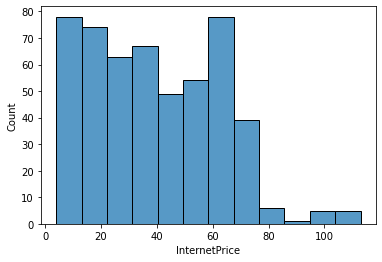

In [41]:
sns.histplot(df.InternetPrice)

In [42]:
minmax = df.groupby('Country').agg({'InternetPrice': [np.min, np.max]})['InternetPrice']

<AxesSubplot:xlabel='amin', ylabel='amax'>

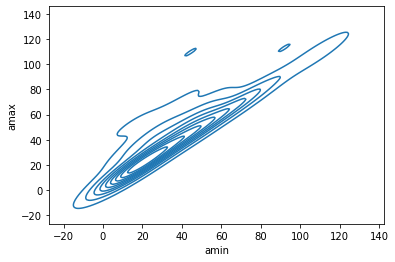

In [43]:
sns.kdeplot(x=minmax['amin'], y=minmax['amax'])

# order by largest difference between min and max in a country

In [44]:
largest_diff = minmax.loc[(minmax['amax'] - minmax['amin']).sort_values(ascending=False).index]

In [45]:
largest_diff

,amin,amax
Country,,
"""United States of America""",44.350000,109.553333
"""Egypt""",13.720764,51.795334
"""Croatia""",23.050386,54.885816
"""Canada""",42.448409,73.148285
"""Austria""",21.291356,43.959559
...,...,...
"""Montenegro""",24.291709,24.291709
"""Namibia""",48.159339,48.159339
"""Nepal""",17.346450,17.346450


In [46]:
df.head()

,City,Region,Country,InternetPrice
0,New York City,"""New York""","""United States of America""",66.441395
1,"Washington, D.C.","""District of Columbia""","""United States of America""",60.590455
2,San Francisco,"""California""","""United States of America""",68.988824
3,Berlin,"""""","""Germany""",35.827084
4,Los Angeles,"""California""","""United States of America""",66.690222


# show price variance of the top polarized price countries

In [47]:
filltered_diff_countries = df[df['Country'].isin(largest_diff[:5].reset_index().Country)]

<AxesSubplot:xlabel='InternetPrice', ylabel='Country'>

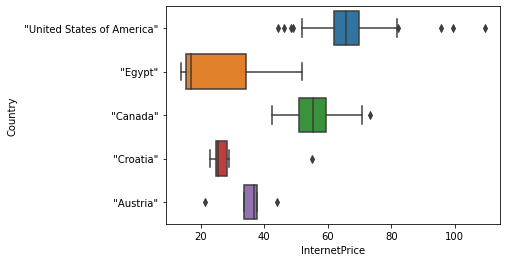

In [48]:
sns.boxplot(y="Country", x="InternetPrice", data=filltered_diff_countries, orient='h')